# Supervised Learning and Linear Methods.
## Instructions and Requirements:
This week workshop will have three sections:
*   Section-1: Simple Linear Regression with Analytic Approach. 
    *   Objectives:
         *   In this section we will implement ordinary least square methods to build a Simple Linear Regression Model.
  *   Datasets:
        *   "headbrain.csv"
    *   Learning outcomes:
      *   Understand what is Simple Linear Regression.
      *   Use Python with Numpy to build basic Simple Linear Regression model with OLS.

*   Section-2: Multiple Linear Regression with Machine Learning Approach.
  *   Objectives:
      *   Understand the steps included in building Machine Learning Models.
  *   Datasets:
      *   "performance.csv".
  *   Learning Outcomes:
      *   Get familiar with various steps in building Machine Learning Model.
      *   Implement and build Multiple Linear Regression from Scratch with python and Numpy.
*   Section-3: Introduction to SKLEARN.
  *   Objectives:
      *   Introduction of SKLEARN, a machine learning model building library.
  *   Learning Outcomes:
      *   Ger familiar with SKLEARN library.
      
## Requirements:
Notebook Environment(Jupyter or Google Colab)

*   Author: Siman Giri


# Regression Algorithm.
___

The task of the Regression Algorithm is to find the $\color{purple}{maping}$ function black to map the $\color{black}{input}$ variable $\textbf{(X)}$ to the continious output variable$\textbf{(Y)}$.

Regression analysis estimates the realtionship between a dependent variables and independent variables.
In the class we talked about two different approach

1.   Analytical Approach i.e Ordinary Least Square Methods
2.   Machine Learning Approach i.e Using Gradient Descent
In this exercise you are expected to implement both the methods from scratch.


# Section-1: Simple Linear Regression with Analytical Approach.


## Ordinary Least Square Implementation from scratch
As per the Lectures, we can define the linear relationships between two variables as follows:
\begin{align}
        \mathbf{y} = b _0 + b_1x
    \end{align}

Here:
$\theta _1$ is called scale factor or $\textbf{coefficient/slope}$ and can be calculated as:
\begin{align}
        \mathbf{b _1} = \frac{\sum_{i=0}^n(x_i-\bar{x}))(y_i-\bar{y}) }{\sum_{i=1}^n(x_i-\bar{x})}.
    \end{align}
$\theta_o$ is an $\textbf{intercept}$ and calculated as:
\begin{align}
        \mathbf{b_0} = \bar{y} - b_1\bar{x}
    \end{align}

Implementation:

Start with Necessary Imports:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1 = "/content/drive/MyDrive/Week9/headbrain.csv"

In [4]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0)


## STEP-1: Define Decision Process.

*   Objective of the Task:
  *   To Predict the weight of brain from given datasets.
*   Tasks to Do:
  1.   Read and Observe the Dataset.
  2.   Print top(5) and bottom(5) of the dataset {Hint: pd.head and pd.tail}.
  3.   Print the Information of Datasets.
  3.   Identify $\color{red}{\textbf{Dependent}}$ $\color{red}{\textbf{Variable}}$ and $\color{red}{\textbf{Independent}}$ $\color{red}{\textbf{Variable}}$.
            *   {Hint: $\textbf{Variables}$ depends on the $\textbf{Objective}$ of the task.}
  1.   Split the data into Independent and Dependent Arrays { Hint: Split and Convert pandas dataframe to numpy arrays-You can use df.to_numpy()}.
  6.   Find the mean of Dependent $\textbf{(Y)}$ and Independent $\textbf{(X)}$ Varaible.
  

In [7]:
# Your Code To read Datasets.
df = pd.read_csv(path1)

In [9]:
df.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [10]:
df.tail()

,Head Size(cm^3),Brain Weight(grams)
232,3214,1110
233,3394,1215
234,3233,1104
235,3352,1170
236,3391,1120


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Head Size(cm^3)      237 non-null    int64
 1   Brain Weight(grams)  237 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


In [32]:
# Your code to convert to array.
# Store in the variable name X: for independent and Y for dependent.
X = df["Head Size(cm^3)"].to_numpy()
Y = df["Brain Weight(grams)"].to_numpy()

In [33]:
X_mean = X.mean()
Y_mean = Y.mean()
print("X mean: " + str(X_mean))
print("Y mean: " + str(Y_mean))

X mean: 3633.9915611814345
Y mean: 1282.873417721519


In [26]:
# Sanity Check
if X.shape == Y.shape:
  print("Proceed Further")
else:
  print("Array Conversion Error: Try Again")

Proceed Further


## Step-2: Calculate $b_0$ and $b_1$ :
using the given formula:
\begin{align}
        \mathbf{b _1} = \frac{\sum_{i=0}^n(x_i-\bar{x})(y_i-\bar{y}) }{\sum_{i=1}^n(x_i-\bar{x})^2}.
    \end{align}
$b_0$ is an intercept and calculated as:
\begin{align}
        \mathbf{b_0} = \bar{y} - b_1 \bar{x}
    \end{align}


In [39]:
def calculate_parameters(x, y):
  """
  Arguments:
  This function calculates parameters b0 and b1.
  Input parameters:
    x: Array of Independent Varaibles.
    y: Array of Dependent Varaibles.
  Output:
    b0 and b1
  """
  n = len(x)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  numer = np.sum((x - mean_x) * (y -mean_y))
  denom = np.sum((x - mean_x)**2)
  b1 = numer/denom
  b0 = mean_y - (b1*mean_x)
  return b1, b0

In [40]:
b1, b0 = calculate_parameters(X,Y)
print(b1, b0)

0.2634293394893993 325.5734210494428


## Step-3: Make a Prediction.

In this section, we will use $b_1$ and $b_0$ calculated from step-2 to make a prediction.


In [34]:
# Let's create a dummy input data:
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x_dummy = np.linspace(min_x, max_x, 100)
x_dummy.shape

(100,)

In [35]:
# Let's Make some Predictions:
y_pred = b0 + b1*x_dummy

In [36]:
# Sanity Check
if x_dummy.shape == y_pred.shape:
  print("Proceed Further")
else:
  print("Prediction may not be correct: Try Again")
  

Proceed Further


## Step-4: Evaluate a Model.

In this section, we will use $b_1$ and $b_0$ calculated from step-2 to make a prediction.

Lets see How Good is our model. As discussed in the lecture and Tutorial we will use Root Mean Squared Error and Coefficient of Determination( R2 )
Mathematically:
\begin{align}
        \mathbf{RMSE}  = \sqrt{1/m\sum_{i=1}^n ((\hat{y_i} - y_i)^2)}
    \end{align}

\begin{align}
        \mathbf{R^2}  = 1 - \frac{SSR}{SST}
    \end{align}

\begin{align}
         \mathbf{SST} = \sum_{i=1}^n (y_i - \bar{y})^2
    \end{align}
\begin{align}
         \mathbf{SSR} = \sum_{i=1}^n (y_i - \hat{y_i})^2
    \end{align}

In [55]:
def root_mean_square(x, y, b0, b1):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
    x: Array of Independent Varaibles.
    y: Array of Dependent Varaibles.
    b0: Parameters.
    b1: Parameters.
  Output Arguments:
    rmse: Root Mean Square.
  """
  m = len(x)
  rmse = 0
  for i in range(m):
    y_pred = b0 + b1 * x[i]
    rmse += (y_pred - y[i])**2
  rmse = np.sqrt(rmse/m)
  return rmse

In [57]:
rmse = root_mean_square(X,Y,b0,b1)
rmse

72.1206213783709

In [60]:
def r_squared(x, y, b0, b1):
  """
   This Function calculates the R Squared Error.
  Input Arguments:
    x: Array of Independent Varaibles.
    y: Array of Dependent Varaibles.
    b0: Parameters.
    b1: Parameters.
  Output Arguments:
    rsquared: R Squared Error.
    """
  sst = 0
  ssr = 0
  n = len(x)
  mean_y = np.mean(y)
  for i in range(n):
    y_pred = b0 + b1 * x[i]
    sst += (y[i] - mean_y)**2
    ssr += (y[i] - y_pred)**2
    rsquared = 1 - (ssr/sst)
  return rsquared


In [62]:
r2 = r_squared(X,Y, b0, b1)
r2

0.6393117199570003

## Visualize the Model.


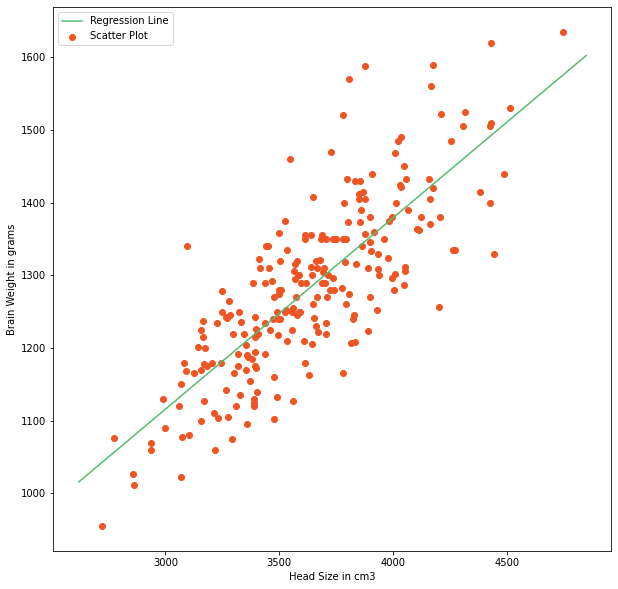

In [63]:
#Y = b0 + b1*X # Equation of Straight Line.
y_pred = b0 + b1*x_dummy
# Ploting Line
plt.plot(x_dummy, y_pred, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

# Section-2: Multiple Linear Regression With Machine Learning Approach.


##Implement Multiple Linear Regression with Gradient Descent From scratch.

Multiple Linear Regression is a type of Linear Regression when the input has multiple features ((variables)).Similar to Simple Linear Regression, we have input variable(X) and output variable(Y). But the input variable has nn features. Therefore, we can represent this linear model as follows;
\begin{align}
        \mathbf{Y} = \theta_o + \theta_1x_1 + \theta_2x_2 + .....+ \theta_nx_n
    \end{align}
Rewriting the equation:where $x_0 = 1$:
\begin{align}
        \mathbf{Y} = \theta_ox_0 + \theta_1x_1 + \theta_2x_2 + .....+ \theta_nx_n
    \end{align}
Convert the equation to matrix:
\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
where:
\begin{align}
        \mathbf{\theta} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

Our function can now be defined as:
\begin{align}
        \mathbf{h_\theta(.)}  = \theta^T x
    \end{align}
And the cost function will be:
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2n} \sum_{i=1}^n(h_\theta(x_i) - y_i)^2
    \end{align}

Implementation:

Start with Necessary Imports:


In [64]:
path2 = "/content/drive/MyDrive/Week9/performance.csv"


In [65]:
# Necessary imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 10.0)

## STEP-1: Define Decision Process.

*   Objective of the Task:
  *   To Predict the marks obtained in writing based on the marks of Math and Reading.
*   Tasks to Do:
  1.   Read and Observe the Dataset.
  2.   Print top(5) and bottom(5) of the dataset {Hint: pd.head and pd.tail}.
  3.   Print the Information of Datasets.
  3.   Identify $\color{red}{\textbf{Dependent}}$ $\color{red}{\textbf{Variable}}$ and $\color{red}{\textbf{Independent}}$ $\color{red}{\textbf{Variable}}$.
            *   {Hint: $\textbf{Variables}$ depends on the $\textbf{Objective}$ of the task.}
  1.   Split the data into Independent and Dependent Arrays { Hint: Split and Convert pandas dataframe to numpy arrays-You can use df.to_numpy()}.
  6. Visualize the dataset, Visualizing multi-variate dataset is not easy, In this particular case we can use special 3-D plot, Please go through the code.

In [73]:
df = pd.read_csv(path2)

In [70]:
df.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [71]:
df.tail()

,Math,Reading,Writing
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78
999,66,66,72


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [74]:
# Your code to read data and Converting to arrays here:
# store the array with name, math, read, and write
math = df["Math"].to_numpy()
read = df["Reading"].to_numpy()
write = df["Writing"].to_numpy()

In [75]:
# Sanity Check
if math.shape == read.shape == write.shape:
  print("Proceed Further")
else:
  print("Array Conversion Error: Try Again")

Proceed Further


### Visualize the Dataset.

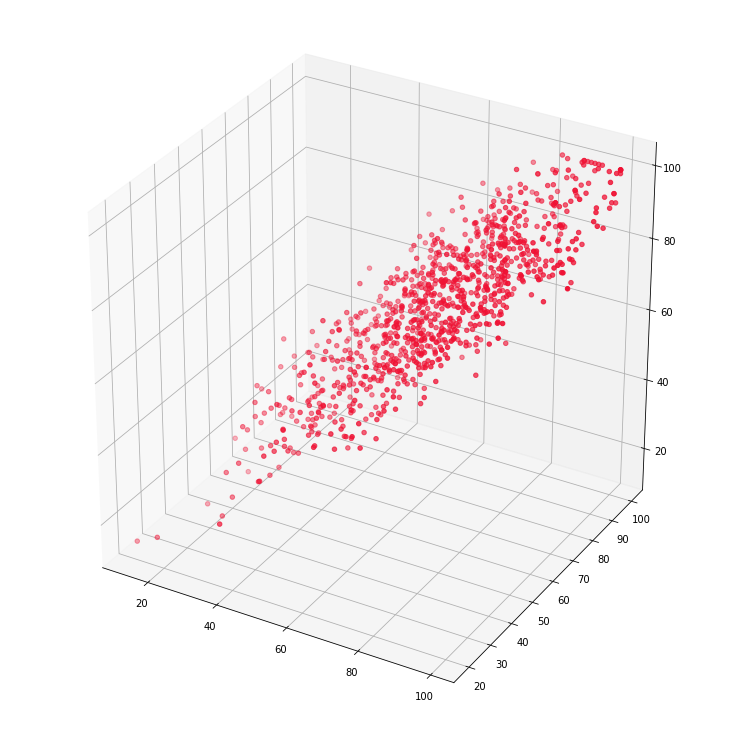

In [76]:
from mpl_toolkits.mplot3d import Axes3D
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.show()

### Store the arrays in the Matrix Form:
Implement Following Equations:

\begin{align}
        \mathbf{Y} = \theta^T X + \theta_0
    \end{align}
In Machine Learning parameters $\theta$ are also called weights, so from this step onwards we represent $\theta$ as $\textbf{W}$.

Here-Now:
\begin{align}
        \mathbf{Y} = W^T X + W_0
    \end{align}

\begin{align}
        \mathbf{W} = [\theta_o, \theta_1, ...., \theta_n]^T
    \end{align}
\begin{align}
        \mathbf{X} = [x_o, x_1, ...., x_n]^T
    \end{align}

In [87]:
# initializing Matrices which act as an Container to hold our Data.
x0 = np.ones(len(math))
X2 = np.array([x0,math,read]).T
W = np.array([0,0,0])
Y2 = np.array(write)


## Step-2: Implement a Error/Cost Function.

We will use the Cost function: Mean Square Error i.e.
\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(y_{pred} - y_i)^2
    \end{align}

Further Simplifications:

\begin{align}
        \mathbf{J(\theta)}  = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x_i) - y_i)^2
    \end{align}
Here:
\begin{align}
  h_\theta = \theta_1*x 
    \end{align}

Note:
In Machine Learning, m: denotes the length of the array (total No of rows in our case).



In [88]:
#Define the cost function
def cost_function(X, Y, W):
    """ Parameters:
    This function finds the Mean Square Error.
    Input parameters:
      X: Feature Matrix
      Y: Target Matrix
      W: Weight Matrix
    Output Parameters:
      J: accumulated mean square error.
    """
    m = len(Y) # len of data in your datasets
   
    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J

In [89]:
inital_cost = cost_function(X2, Y2, W)
print(inital_cost)

2470.11


## Step-3: Optimization Algorithm

Our goal in this task is to minimize our error function with each input of examples(input data). 
One of the most suitable methods to do the same is 
\begin{align}
$\color{red}{\textbf{GRADIENT DESCENT ALGOROTHIM.}}$
\end{align}

Implement GDA from Scratch.

Function to estimate: 
  *   $h_\theta(x) = \theta^T x$

Loss function to minimize:
  *   $(h_\theta(x) - y)^2$

Gradient: Decsent update:
  *   $\theta_(j+1)   = \theta_j - LR(D_\theta)$
  *   $D(\theta) = 1/m * (\theta^T * X)$ i.e. Derivative of parameters/weights.





In [90]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        Y_pred = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = Y_pred - Y
        # Gradient Calculation
        dw = (X.T.dot(loss) ) / (m)
        # Changing Values of B using Gradient
        W_update = W - alpha * dw
        # New Cost Value
        cost = cost_function(X, Y, W_update)
        cost_history[iteration] = cost
        
    return W_update, cost_history


In [91]:
# 100000 Iterations
alpha = 0.0001 # Learning Rate.
new_weights, cost_history = gradient_descent(X2, Y2, W, alpha, 100000)

# New Values of
print(new_weights)

# Final Cost of our Iterations.
print(cost_history[-1])

[0.0068616 0.4801185 0.5006844]
18.076027940915417


## Final Step: Evaluation of Model:



In [92]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
    rmse: Root Mean Square.
  """
  rmse = np.sqrt(sum((Y-Y_pred)**2)/len(Y))
  return rmse

# Model Evaluation - R2

def r2(Y, Y_pred):
  """
   This Function calculates the R Squared Error.
  Input Arguments:
    Y: Array of actual(Target) Dependent Varaibles.
    Y_pred: Array of predeicted Dependent Varaibles.  
  Output Arguments:
    rsquared: R Squared Error.
    """
  mean_y = np.mean(Y)
  ss_tot = sum((Y - mean_y) ** 2)
  ss_res = sum((Y - Y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2
  

# Let's Check Model Performance:


In [93]:
Y_pred = X2.dot(new_weights)

print(rmse(Y2, Y_pred))
print(r2(Y2, Y_pred))

6.01265797146577
0.8442155132417348


# Section-3: Introduction to SKLEARN.
What is scikit-learn or sklearn?
>  

1.   Scikit-learn is probably the most useful library for machine learning in python.
2.   The sklearn library contains a lot of efficient tools for machine learning and statistical modeling

> Please note that sklearn is used to build machine learning models. It should not be used for reading the data, manipulating and summarizing it. There are better libraries for that (e.g. NumPy, Pandas etc.)


## Build Linear Regression with help of SKLEARN.


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


# Practise Tasks:

For the following Datasets:

Salary.csv: Try implementing Linear Regression with OLS and explain the Result.

Insurance.csv: Try implementing Multiple Linear Regression from Scratch: While Doing that also practise following:
  1.   Can you Identify Qualitative and Quantitative Varaible.
  2.   Drop all the Qualitative Varaible from the dataframe.
  3.   If you do not want to drop the qualitative varaible, you can convert them into numeric variable as you did in Assignment-1. {You can also try sklearn label encoder function.}
  4.   Practise your Visualization Skills.
  

